Временные ряды - финальный проект
====

Основное задание
---

В данном проекте главной задачей будет построить алгоритм, определяющий поиски аномалий.

Можно так же сделать симуляцию своей системы, то есть проверить, как система работала бы в продакшине, какие данные она бы использовала для перетренировки и как часто эта перетренировка бы соврешалась.

**На выбор** у вас два датасета. Один имеет много данных, а второй  временной ряд наоборот, содержат в себе еще очень мало информации. Вы так же можете использовать и другие датасеты из тех, что у вас есть в доступе на гитхабе. Но тогда вам прийдется сформулировать и ту задачу, которую вы пытаетесь решить, а именно пояснить, зачем в данном случае нам нужен поиск аномалий и как это будет применено на практике.


Датасеты
------

Пассажиропоток нью-йоркского такси
--
Данные за период с Июля, 2014 года по Январь, 2015. Агрегированы с интервалом в 30 минут.

Задание:
----

* Агрегировать данные по 1 часу
* Построить алгоритм определения аномалий с задержкой в 24 часа


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [103]:

df = pd.read_csv('../datatest/nyc_taxi.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp').resample('H').sum().dropna()
df.head()


,value
timestamp,
2014-07-01 00:00:00,18971
2014-07-01 01:00:00,10866
2014-07-01 02:00:00,6693
2014-07-01 03:00:00,4433
2014-07-01 04:00:00,4379


1. Visualisation

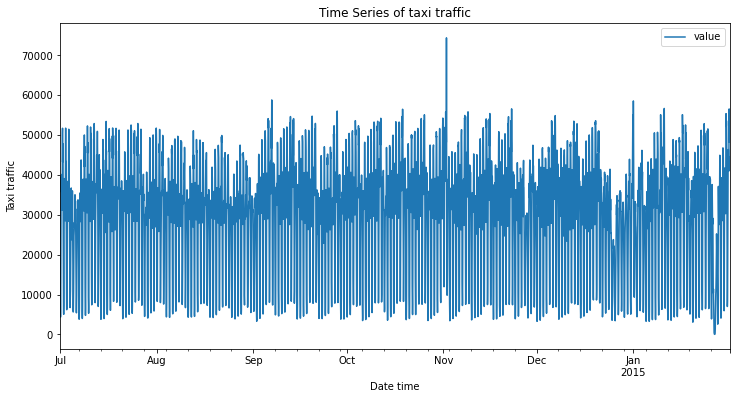

In [23]:
df.plot(y='value', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Taxi traffic')
plt.title('Time Series of taxi traffic');

2. anomaly detecation

Используем алгоритм изолирующих деревьев. Прописываем, что 0.01 наших данных являются аномалиями.

In [104]:
# train isolation forest
model =  IsolationForest(contamination=0.01)
model.fit(df)



IsolationForest(contamination=0.01)

In [106]:
df1 = df.copy()
df1['anomaly'] = model.predict(df)
df1['anomaly1'] = df1.loc[df1['anomaly'] == -1, 'value'] #anomaly
df1

,value,anomaly,anomaly1
timestamp,,,
2014-07-01 00:00:00,18971,1,NaN
2014-07-01 01:00:00,10866,1,NaN
2014-07-01 02:00:00,6693,1,NaN
2014-07-01 03:00:00,4433,1,NaN
2014-07-01 04:00:00,4379,1,NaN
...,...,...,...
2015-01-31 19:00:00,56577,-1,56577.0
2015-01-31 20:00:00,48276,1,NaN
2015-01-31 21:00:00,48389,1,NaN


Красным обозначены аномалии

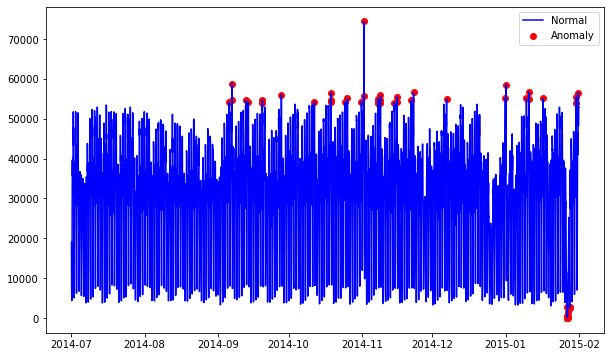

In [107]:
# visualization
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['value'], color='blue', label = 'Normal')
ax.scatter(y = df1['anomaly1'], x = df1.index, color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [109]:
scores = model.score_samples(df)
scores

array([-0.54144507, -0.56046743, -0.52136043, ..., -0.50381773,
       -0.61061199, -0.60849008])


Общие рекомендации
------
* Старайтесь описывать свои шаги, чтобы ход ваших мыслей был понятным
* Выбор модели остается за вами
* Опишите плюсы и минусы вашей модели
* Опишите дальнейшие действия - как бы вы дальше улучшили проект, какие данные еще бы использовали

Критерии оценки
-----
* Отсутсвтие ошибок в коде и багов
* Обоснованный выбор модели
* Четкое описание действий, хороший отчет
* Приветствуются техники кросс-валидации и симуляции системы

In [ ]:
df